In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
shakira = pd.read_csv("Youtube05-Shakira.csv")  
shakira

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [4]:
shakira.drop(columns=['COMMENT_ID', 'AUTHOR','DATE'], inplace = True)
shakira   #spam = 1, ham(legimimate) = 0

,CONTENT,CLASS
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0
...,...,...
365,I love this song because we sing it at Camp al...,0
366,I love this song for two reasons: 1.it is abou...,0
367,wow,0
368,Shakira u are so wiredo,0


In [5]:
shakira.isna().any()

CONTENT    False
CLASS      False
dtype: bool

In [6]:
shakira.drop_duplicates(inplace = True)
shakira.duplicated().sum()

0

In [7]:
shakira[shakira['CLASS']== 1].count()

CONTENT    150
CLASS      150
dtype: int64

In [8]:
# ham
shakira[shakira['CLASS'] == 0].count()

CONTENT    181
CLASS      181
dtype: int64

## Data Preprocessing

In [9]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [10]:
'''
Create a function that
- changes all the words to lower case
- tokenize the words
- remove special characters
- remove stop words and punctuation
- stemming

'''

def text_processing(CONTENT):
    text = CONTENT.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for j in text:
        if j not in stopwords.words('english') and i not in string.punctuation:
            y.append(j)
    text = y[:]
    y.clear()

    for w in text:
     #   y.append(ps.stem(w))     incase for stemming
        y.append(w)
    return " ".join(y)

In [11]:
#Adding a new column for the processed text from the content column
shakira['TEXT_PROCESSED'] = shakira['CONTENT'].apply(text_processing)
shakira.head(20)

,CONTENT,CLASS,TEXT_PROCESSED
0,Nice song﻿,0,nice
1,I love song ﻿,0,love song
3,"860,000,000 lets make it first female to reach...",0,lets make first female reach one billion share...
4,shakira is best for worldcup﻿,0,shakira best
5,The best world cup song ever!!!!﻿,0,best world cup song ever
6,I love﻿,0,
7,SEE SOME MORE SONG OPEN GOOGLE AND TYPE Shakir...,1,see song open google type shakira
8,Awesome ﻿,0,awesome
9,I like shakira..﻿,0,like shakira
10,Shakira - Waka Waka <br />LOVE THIS SONG!!!!!!...,0,shakira waka waka br love song


## Model Building
Algorithm used are
- Support Vector Classification(Linear, Polynomial, Gaussian)
- The Naive Bayes Method(Multinomial, Bernouli, Gaussian)
- Random Forest
- Decision Tree(CART)
- KNNeighbor
- Logistics Regression

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000 )
X = tfidf.fit_transform(shakira['TEXT_PROCESSED']).toarray()
y = shakira['CLASS'].values
#X.shape
#X = CountVectorizer(analyzer=text_processing).fit_transform(psy['CONTENT'])
#bag_of_words.shape
X.shape


(331, 837)

In [13]:
'''
splitting the data into training and testing set 
importing the necessary library for the Supervised Techniques and checking the accuracy/validity of the model
'''
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 0)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score, matthews_corrcoef

In [14]:
svc_Linear = SVC()
svc_Polynomial = SVC(kernel='poly')
svc_Gaussian = SVC(kernel='rbf')
knc = KNeighborsClassifier(n_neighbors=3)
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=80)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [15]:
clfs = {
    'SVM_Linear' : svc_Linear,
    'SVM_Polynomial' : svc_Polynomial,
    'SVM_Gaussian' : svc_Gaussian,
    'KNNeighbor' : knc, 
    'CART': dtc, 
    'LogisticsRegression': lrc, 
    'RandomForest': rfc, 
    'GaussianNB': gnb,
    'MultinomialNB': mnb,
    'BernoulliNB':bnb
}

In [16]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f_score = f1_score(y_test, y_pred)
    con_matrices =confusion_matrix(y_test,y_pred)
    return accuracy,precision,f_score,con_matrices

## Model Performance(UnOptimized)
- Matthew correlation Coefficient
- Accuracy
- Precision
- F_score
- Confusion Matrix

In [17]:
'''
   Using the Matthews correlation coefficient
'''

mcc_scores = []
for name, clf in clfs.items():
    clf.fit(X_train,y_train)
    current_mcc = matthews_corrcoef(y_test,clf.predict(X_test))
   
    print("==================")
    print(name)
    print(current_mcc)
    mcc_scores.append(current_mcc)


'''
    Checking the Accuracy, Precision, F-score and the confusion Matrix
'''

accuracy_scores = []
precision_scores = []
f1_scores = []
confusion_matrices = []
for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_f1_score, confusion_matrice = train_classifier(clf, X_train,y_train,X_test,y_test)
    print('--------------------------------')
    print(name)
    print("Accuracy ",current_accuracy)
    print("Precision - ",current_precision)
    print("f1_scores" , current_f1_score) 
    print('Confusion Matrix\n ',confusion_matrice)  
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1_score)
    confusion_matrices.append(confusion_matrice)

    print('--------------------------------')

SVM_Linear
0.6412519283220873
SVM_Polynomial
0.5410894360249309
SVM_Gaussian
0.6412519283220873
KNNeighbor
0.4948973202943931
CART
0.6648943514093886
LogisticsRegression
0.6475860093678135
RandomForest
0.6209677419354839
GaussianNB
0.4985188590435954
MultinomialNB
0.5033611367771605
BernoulliNB
0.3968016273195801
--------------------------------
SVM_Linear
Accuracy  0.8208955223880597
Precision -  0.8518518518518519
f1_scores 0.7931034482758621
Confusion Matrix
  [[32  4]
 [ 8 23]]
--------------------------------
--------------------------------
SVM_Polynomial
Accuracy  0.7164179104477612
Precision -  0.62
f1_scores 0.7654320987654321
Confusion Matrix
  [[17 19]
 [ 0 31]]
--------------------------------
--------------------------------
SVM_Gaussian
Accuracy  0.8208955223880597
Precision -  0.8518518518518519
f1_scores 0.7931034482758621
Confusion Matrix
  [[32  4]
 [ 8 23]]
--------------------------------
--------------------------------
KNNeighbor
Accuracy  0.7014925373134329
Preci

In [18]:
'''
    Arranging the performance based on the Matthew correlation coefficient in descending order for each Algorithm
'''
performance_shakira = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'F_scores':f1_scores, 'MCC_scores': mcc_scores}).sort_values('MCC_scores', ascending=False)
performance_shakira

,Algorithm,Accuracy,Precision,F_scores,MCC_scores
4,CART,0.791045,0.707317,0.805556,0.664894
5,LogisticsRegression,0.820896,0.771429,0.818182,0.647586
0,SVM_Linear,0.820896,0.851852,0.793103,0.641252
2,SVM_Gaussian,0.820896,0.851852,0.793103,0.641252
6,RandomForest,0.820896,0.771429,0.818182,0.620968
1,SVM_Polynomial,0.716418,0.620000,0.765432,0.541089
8,MultinomialNB,0.716418,1.000000,0.558140,0.503361
7,GaussianNB,0.746269,0.818182,0.679245,0.498519
3,KNNeighbor,0.701493,0.612245,0.750000,0.494897
9,BernoulliNB,0.671642,0.909091,0.476190,0.396802


<AxesSubplot:xlabel='Algorithm'>

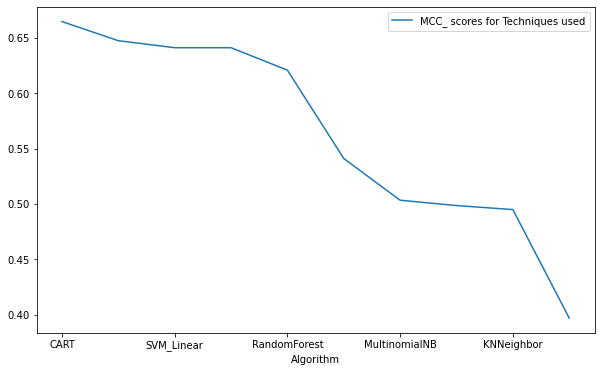

In [19]:
performance_shakira.plot(x='Algorithm', y='MCC_scores', label='MCC_ scores for Techniques used', figsize = [10,6] )

## TUNING RESULT USING GRID SEARCH  

In [20]:
'''
    Tuning the support vectors for Linear, Polynomial and Gaussian to give the optimal parameter
'''
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'C':[0.5,1,10,100,0.1,0.01],
        'gamma':['scale',1, 0.1, 0.01, 0.001, 0.0001],
        'kernel':['rbf'] # ['rbf','poly','linear']
    }
]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0
)
C,g,k = optimal_params.fit(X_train, y_train).best_params_.values()
print(f"-----------")
print(f"C = {C}")
print(f"gamma = {g}")
print(f"kernel = {k}")


-----------
C = 10
gamma = scale
kernel = rbf


In [21]:

'''
    Tuning the Naive Bayes method for Bernoulli, Multinomial and Gaussian to give the optimal parameter
'''

param_grid_nb = {
        'var_smoothing': np.logspace(0, -9, num = 100)
    }

optimal_params = GridSearchCV(estimator = GaussianNB(),param_grid= param_grid_nb,
    cv=10,
    scoring='accuracy',
    verbose=1
) # [multinomialNB, GaussianNB, BernouliNB]
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.15199110829529336)


In [22]:

'''
    Tuning the Naive Bayes method for KNNeigbor
'''

param_grid_knn = {
        'n_neighbors': [1,3,5,7,9]
    }

optimal_params = GridSearchCV(estimator = KNeighborsClassifier(),param_grid= param_grid_knn,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)


KNeighborsClassifier(n_neighbors=1)


In [23]:
'''
    Tuning the RandomForest 
'''

param_grid_rfc = {
        'n_estimators': [20,40,60,80,100]
    }

optimal_params = GridSearchCV(estimator = RandomForestClassifier(),param_grid= param_grid_rfc,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)



RandomForestClassifier(n_estimators=20)


In [24]:
'''
    Tuning the RandomForest 
'''
param_grid_lrc = [
{
        'C': [10, 15,20,30],
     }

]

optimal_params = GridSearchCV(estimator = LogisticRegression(),param_grid= param_grid_lrc,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)


LogisticRegression(C=10)


In [25]:
'''
    Tuning the Decision Tree (CART) 
'''
param_grid_dtc = [
{
        'criterion': ["gini"],
        'random_state':[None, 1,2,4,8,10]
     }

]

optimal_params = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid= param_grid_dtc,
    cv= 10,
    scoring ='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)

DecisionTreeClassifier(random_state=10)


## OPTIMIZED MODEL(Performance)

             Algorithm  Accuracy  Precision  F_scores  MCC_scores
4                 CART  0.791045   0.707317  0.805556    0.664894
5  LogisticsRegression  0.820896   0.771429  0.818182    0.647586
0           SVM_Linear  0.820896   0.851852  0.793103    0.641252
2         SVM_Gaussian  0.820896   0.851852  0.793103    0.641252
6         RandomForest  0.820896   0.771429  0.818182    0.620968
1       SVM_Polynomial  0.716418   0.620000  0.765432    0.541089
8        MultinomialNB  0.716418   1.000000  0.558140    0.503361
7           GaussianNB  0.746269   0.818182  0.679245    0.498519
3           KNNeighbor  0.701493   0.612245  0.750000    0.494897
9          BernoulliNB  0.671642   0.909091  0.476190    0.396802


<AxesSubplot:xlabel='Algorithm'>

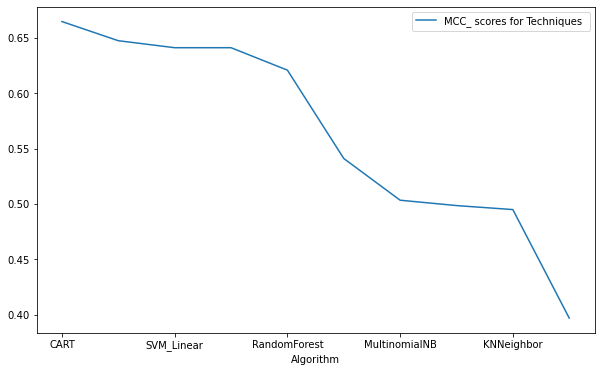

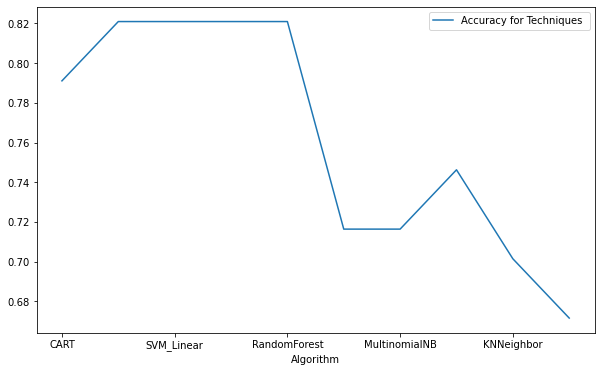

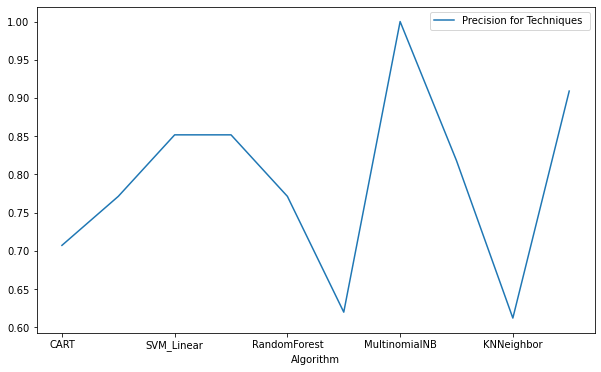

In [26]:
svc_Linear = SVC(kernel='linear', C=1, gamma = "scale")
svc_Polynomial = SVC(kernel='poly', C= 1, gamma = "scale")
svc_Gaussian = SVC(kernel='rbf',C = 10, gamma= 0.1)
knc = KNeighborsClassifier(n_neighbors=1, algorithm= "auto")
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1', C = 10)
rfc = RandomForestClassifier(n_estimators=20, random_state=10)
gnb = GaussianNB( var_smoothing=0.15199110829529336)
bnb = BernoulliNB()

clfs = {
    'SVM_Linear' : svc_Linear,
    'SVM_Polynomial' : svc_Polynomial,
    'SVM_Gaussian' : svc_Gaussian,
    'KNNeighbor' : knc, 
    'CART': dtc, 
    'LogisticsRegression': lrc, 
    'RandomForest': rfc, 
    'GaussianNB': gnb,
    'MultinomialNB': mnb,
    'BernoulliNB':bnb
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f_score = f1_score(y_test, y_pred)
    con_matrices =confusion_matrix(y_test,y_pred)
    return accuracy,precision,f_score,con_matrices

'''
    Arranging the performance based on the Matthew correlation coefficient in descending order for each Algorithm
'''
performance_shakira = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'F_scores':f1_scores, 'MCC_scores': mcc_scores}).sort_values('MCC_scores', ascending=False)
print(performance_shakira)

performance_shakira.plot(x='Algorithm', y='MCC_scores', label='MCC_ scores for Techniques ', figsize = [10,6] )

performance_shakira.plot(x='Algorithm', y='Accuracy', label='Accuracy for Techniques ', figsize = [10,6] )

performance_shakira.plot(x='Algorithm', y='Precision', label='Precision for Techniques ', figsize = [10,6] )

<AxesSubplot:>

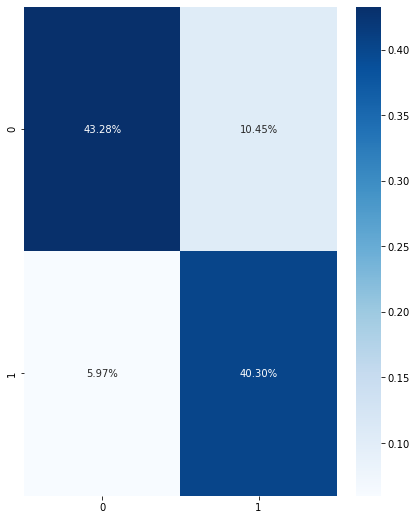

In [29]:
import seaborn as sns
'''
    A Heatmap confusion matrix for the predicted outcome for Linear support Vector Algorithms
'''
svc_Linear.fit(X_train,y_train)
y_pred_mnb = svc_Linear.predict(X_test)
cm = confusion_matrix(y_test,y_pred_mnb)
plt.figure(figsize=(7,9))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
